# Лабораторная работа №6. Анализ и визуализация больших объемов данных (специализация ИТ)

**Цель лабораторной работы:**

Получить навыки обработки больших объемов данных с использованием MongoDB, Pandas и библиотеки визуализации Plotly.

**Автор работы:**

|Выполнил(а)| Группа | Дата |
|---|---|---|
| ФИО | Группа | Дата |

#1. Установка Mongo и импорт необходимых библиотек

Для установки базы данных MongoDB можно воспользоваться стандартной установкой в среде Linux, т.е. командой **apt-get install mongodb**.

Нужно помнить, что данные будут удалены автоматически через 12 часов. Если возникает необходимость в сохранении созданной БД, то ее можно сохранить на своем диске.

In [1]:
!apt-get install mongodb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
mongodb is already the newest version (1:3.6.9+really3.6.8+90~g8e540c0b6d-0ubuntu5.3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


Выполняем остановку службы MongoDB для монтирования диска и перенаправления пути сохранения базы.

In [2]:
!service mongodb stop

 * Stopping database mongodb
   ...done.


Монтируем свой Google Drive, чтобы иметь возможность разместить каталог с данными MongoDB для длительного хранения.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Перезапускаем службу MongoDB с параметром **dbpath** для указания нового пути сохранения.

In [4]:
# Перезапуск службы MongoDB с параметром dbpath для указания нового пути
!service mongodb start --dbpath /content/drive/MyDrive/mongodb

 * Starting database mongodb
   ...done.


## 1.1. Установка РyMongo

[PyMongo](https://pymongo.readthedocs.io/en/stable/) — это дистрибутив Python, содержащий инструменты для работы с MongoDB, и рекомендуемый способ работы с MongoDB из Python. Для обеспечения интерфейса MongoDB с Python, нам понадобится установка этого пакета.

In [5]:
! python -m pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##1.2 Импорт библиотек

In [23]:
import pymongo                            # Библиотека для доступа MongoDB
from pymongo import MongoClient           # Импортируем MongoClient 
import pandas as pd                       # Библиотека для работы с DataFrame
import folium                             # Библиотека для создания карты
from folium import plugins                # Плагин для создания цифровой карты
import json

## 1.3 Импортирт набора данных в mongodb

In [49]:
# Скачать ограниченный набор данных для тренировки
url = "https://github.com/SerjiEvg/data-analysis/blob/main/data/telefoniaBCN.csv.zip?raw=true"
!wget $url
!unzip telefoniaBCN.csv.zip

--2023-03-13 07:44:16--  https://github.com/SerjiEvg/data-analysis/blob/main/data/telefoniaBCN.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SerjiEvg/data-analysis/raw/main/data/telefoniaBCN.csv.zip [following]
--2023-03-13 07:44:16--  https://github.com/SerjiEvg/data-analysis/raw/main/data/telefoniaBCN.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SerjiEvg/data-analysis/main/data/telefoniaBCN.csv.zip [following]
--2023-03-13 07:44:17--  https://raw.githubusercontent.com/SerjiEvg/data-analysis/main/data/telefoniaBCN.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

##1.4 Подключение к базе данных и загрузка коллекции

In [31]:
mng_client = pymongo.MongoClient()
client = MongoClient()
client.list_database_names()
db = client.brny4kjelauboxl
db.create_collection('mobileBCN') # Опциональное создание коллекции 
collection = db.mobileBCN

In [32]:
data = pd.read_csv('telefoniaBCN.csv', index_col = 'timestamp_')
data.head(5)

,Senyal,OperadorDesc_,net_type,Activitat,NOM_MUNI,Year,Month,Hour,Carrier,weekday,Lat,Lng
timestamp_,,,,,,,,,,,,
1.488991e+12,3,NaN,4G,IN_VEHICLE,Barcelona,2017,3,16,movistar,NaN,41.406,2.166
1.488991e+12,20,NaN,2G,UNKNOWN,Barcelona,2017,3,16,pepephone,NaN,41.391,2.156
1.488991e+12,10,NaN,4G,IN_VEHICLE,Barcelona,2017,3,16,movistar,NaN,41.414,2.172
1.488992e+12,18,NaN,3G,ON_FOOT,Barcelona,2017,3,16,pepephone,NaN,41.390,2.157
1.488992e+12,13,NaN,3G,STILL,Barcelona,2017,3,16,orange,NaN,41.397,2.193


In [33]:
dict_data = data.to_dict('records')
collection.insert_many(dict_data)

In [34]:
num_documents = collection.count_documents({'_id' : {'$exists' : 1}})     # Counts the documents in database
print ( 'Number of documents in database = ' + str(num_documents) )
list ( collection.find().limit(1) )  

Number of documents in database = 382377


[{'_id': ObjectId('640ec9c00d88d0eb541c040e'),
  'Senyal': 3,
  'OperadorDesc_': nan,
  'net_type': '4G',
  'Activitat': 'IN_VEHICLE',
  'NOM_MUNI': 'Barcelona',
  'Year': 2017,
  'Month': 3,
  'Hour': 16,
  'Carrier': 'movistar',
  'weekday': nan,
  'Lat': 41.406,
  'Lng': 2.166}]

#1.5. Просмотр документа из коллекции

In [ ]:
databases = client.list_database_names()                # Show database names
db = client.brny4kjelauboxl                                   # Set the database to work in
collections = db.list_collection_names()                # List the collections available 
collection = db.mobileBCN                               # Set collection 
print ("Databases: " + str(databases) + "\nCollections: " + str(collections))      

Databases: ['brny4kjelauboxl']
Collections: ['profiles', 'mobileBCN']


In [ ]:
list( collection.find().limit(1) )

[{'Activitat': 'UNKNOWN',
  'Carrier': 'pepephone',
  'Hour': 16,
  'Lat': 41.391,
  'Lng': 2.156,
  'Month': 3,
  'NOM_MUNI': 'Barcelona',
  'OperadorDesc_': '',
  'Senyal': 20,
  'Year': 2017,
  '_id': ObjectId('5e7549548307b5e3d4cd383d'),
  'net_type': '2G',
  'timestamp_': 1488991478972,
  'weekday': ''}]

Чтобы узнать, сколько документов хранится в базе данных, можно подсчитать документы с '_id'

In [35]:
collection.count_documents({'_id' : {'$exists' : 1} })

382377

In [36]:
print ( collection.distinct('Carrier') ) 
print ( collection.distinct('Month') )
print ( collection.distinct('Activitat') )

['movistar', 'pepephone', 'orange', 'yoigo', 'vodafone', 'jazztel', 'other', 'lowi', 'eroski', 'masmovil', 'simyo']
[3, 2, 1, 12, 11, 10, 9, 8, 7, 6, 5, 4]
['IN_VEHICLE', 'UNKNOWN', 'ON_FOOT', 'STILL', 'TILTING', 'ON_BICYCLE', nan]


In [37]:
collection.create_index([( 'Carrier', pymongo.ASCENDING)])        # Создаем индекс для Carrier
collection.create_index([( 'Month', pymongo.ASCENDING)])          # Создаем индекс для Month
collection.create_index([( 'Activitat', pymongo.ASCENDING)])      # Создаем индекс для Activitat
collection.create_index([( 'net_type', pymongo.ASCENDING)])       # Создаем индекс для net_type

collection.index_information()                                    # Показать существующие индексы

{'_id_': {'v': 2, 'key': [('_id', 1)], 'ns': 'brny4kjelauboxl.mobileBCN'},
 'Carrier_1': {'v': 2,
  'key': [('Carrier', 1)],
  'ns': 'brny4kjelauboxl.mobileBCN'},
 'Month_1': {'v': 2, 'key': [('Month', 1)], 'ns': 'brny4kjelauboxl.mobileBCN'},
 'Activitat_1': {'v': 2,
  'key': [('Activitat', 1)],
  'ns': 'brny4kjelauboxl.mobileBCN'},
 'net_type_1': {'v': 2,
  'key': [('net_type', 1)],
  'ns': 'brny4kjelauboxl.mobileBCN'}}

# 2. Выполнение запросов

## 2.1. Доля рынка операторов сотовой связи в Барселоне

In [38]:
carrier_list = collection.distinct('Carrier')                     # Создаем список с уникальными именами провайдеров сотовой связи

total = 0                                                         
for carrier in carrier_list:                                      
  total_operador = collection.count_documents({'Carrier': carrier })   # для каждого провайдера подсчитываем кол-во документов
  total += total_operador                                         # суммируем кол-во документов
  print ( carrier + ': ' + str(total_operador))                   # выводим название провайдера и кол-во документов
print ( total)

eroski: 177
jazztel: 4441
lowi: 4515
masmovil: 540
movistar: 136277
orange: 79472
other: 15070
pepephone: 15481
simyo: 3627
vodafone: 114562
yoigo: 8215
382377


In [39]:
# Более эффективный способ сделать такой запрос - использовать конвейерную обработку
# Переменная конвейера (pipeline) содержит запрос для передачи в MongoDB в виде агрегации

pipeline = [{ '$group':{                                   # $group, генерирует агрегацию данных
                  '_id' : { 'Carrier' : '$Carrier'}        # идентификатором группы является имя 'Carrier'
                  ,'Carrier' : {'$max' : '$Carrier'}       # $max, сохраняет имя 'Carrier'
                  ,'Total' : {'$sum' : 1}                  # мы генерируем новый ключ 'Total', значением которого будет сумма $sum of carriers
                  }
            },
            { '$project':                                  # $project - создается таблица
                  { '_id' : 0,                             # '_id' всегда отображается. Чтобы скрыть, нужно установить '_id' : 0
                    'Carrier' : 1,                         # чтобы отобразить провайдера, нужно установить  'Carrier' : 1
                    'Total' : 1}                           # чтобы показать итог, включаем  'Total' : 1
            },
            { '$sort': {'Total' : -1}                      # сортируем результат по общей сумме в порядке убывания (-1)
            }
            ]
query = list ( collection.aggregate( pipeline ) )          # конвейер отправляем в mongoDB с помощью collection.aggregate
query 

[{'Carrier': 'movistar', 'Total': 136277},
 {'Carrier': 'vodafone', 'Total': 114562},
 {'Carrier': 'orange', 'Total': 79472},
 {'Carrier': 'pepephone', 'Total': 15481},
 {'Carrier': 'other', 'Total': 15070},
 {'Carrier': 'yoigo', 'Total': 8215},
 {'Carrier': 'lowi', 'Total': 4515},
 {'Carrier': 'jazztel', 'Total': 4441},
 {'Carrier': 'simyo', 'Total': 3627},
 {'Carrier': 'masmovil', 'Total': 540},
 {'Carrier': 'eroski', 'Total': 177}]

In [40]:
df = pd.DataFrame(query)                           # Результат добавлен в Pandas DataFrame
df

,Carrier,Total
0,movistar,136277
1,vodafone,114562
2,orange,79472
3,pepephone,15481
4,other,15070
5,yoigo,8215
6,lowi,4515
7,jazztel,4441
8,simyo,3627
9,masmovil,540


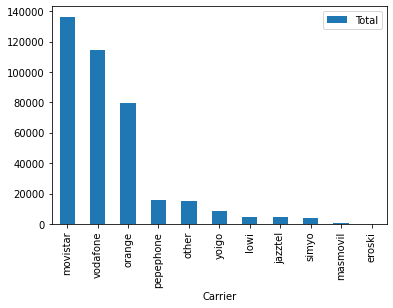

In [41]:
df = df.set_index('Carrier')
df.plot(kind='bar');

## 2.2. Построение тепловой карты

In [42]:
list( collection.find({'Carrier' : 'movistar'}, {'_id', 'Carrier', 'Lat', 'Lng'}).limit(2) )

[{'_id': ObjectId('640ec9c00d88d0eb541c040e'),
  'Carrier': 'movistar',
  'Lat': 41.406,
  'Lng': 2.166},
 {'_id': ObjectId('640ec9c00d88d0eb541c0410'),
  'Carrier': 'movistar',
  'Lat': 41.414,
  'Lng': 2.172}]

In [43]:
pipeline = [{ '$group':{ 
                  '_id' : { 'lat': '$Lat' , 'lon' : '$Lng', 'hour' : '$Hour'}
                  ,'lat' : {'$max' : '$Lat'}
                  ,'lon' : {'$max' : '$Lng'}
                  ,'hour': {'$max' : '$Hour'}
                  ,'Total' : {'$sum' : 1}
                  }
            },
            { '$match':{
                  'hour' : 9
                  }
            },
            { '$project': 
                  { '_id' : 0,
                    'lat' : 1,
                    'lon' : 1,
                    'hour' : 1,
                    'Total' : 1}
            },
            { '$sort': {'Total' : -1}
            }
            ]

query = list ( collection.aggregate( pipeline ) ) 
df = pd.DataFrame(query)
query[0]

{'lat': 41.39, 'lon': 2.138, 'hour': 9, 'Total': 103}

In [44]:
print ( "lat " + str ( float(df.loc[0]['lat']) ) )
print ( "lng " + str ( float(df.loc[0]['lon']) ) )
print ( "totals " + str ( float(df.loc[0]['Total']) ))
# extract lat, lon, and magnitude for the folium heatmap
longitud  = len( df )
lats = []
lngs = []
totals = []
for i in range ( longitud ):
    lats.append ( float(df.loc[i]['lat']) )
    lngs.append ( float(df.loc[i]['lon']) )
    totals.append(float(df.loc[i]['Total']) )

lat 41.39
lng 2.138
totals 103.0


In [45]:
center_lat = 41.388
center_lon = 2.159

locationmap = folium.Map(location=[ center_lat , center_lon ], zoom_start=13, width=800, height=600 )
locationmap.add_child(plugins.HeatMap(zip(lats, lngs, totals), radius = 12))

locationmap

In [46]:
pipeline = [{ '$group':{ 
                  '_id' : { 'lat': '$Lat' , 'lon' : '$Lng', 'hour' : '$Hour'}
                  ,'lat' : {'$max' : '$Lat'}
                  ,'lon' : {'$max' : '$Lng'}
                  ,'hour': {'$max' : '$Hour'}
                  ,'Total' : {'$sum' : 1}
                  }
            },
            { '$match':{
                  'hour' : 21
                  }
            },
            { '$project': 
                  { '_id' : 0,
                    'lat' : 1,
                    'lon' : 1,
                    'hour' : 1,
                    'Total' : 1}
            },
            { '$sort': {'Total' : -1}
            }
            ]

query = list ( collection.aggregate( pipeline ) ) 
df = pd.DataFrame(query)
query[0]

{'lat': 41.382, 'lon': 2.132, 'hour': 21, 'Total': 73}

In [47]:
print ( "lat " + str ( float(df.loc[0]['lat']) ) )
print ( "lng " + str ( float(df.loc[0]['lon']) ) )
print ( "totals " + str ( float(df.loc[0]['Total']) ))
# extract lat, lon, and magnitude for the folium heatmap
longitud  = len( df )
lats = []
lngs = []
totals = []
for i in range ( longitud ):
    lats.append ( float(df.loc[i]['lat']) )
    lngs.append ( float(df.loc[i]['lon']) )
    totals.append(float(df.loc[i]['Total']) )

lat 41.382
lng 2.132
totals 73.0


In [48]:
center_lat = 41.388
center_lon = 2.159

locationmap = folium.Map(location=[ center_lat , center_lon ], zoom_start=13, width=800, height=600 )
locationmap.add_child(plugins.HeatMap(zip(lats, lngs, totals), radius = 12))

locationmap

# 3. Задания

## 2.1. Создать базу данных MongoDB и загрузить BigData 

BigData можем получить из открытых данных Женералитата Каталонии. Исходный набор данных включает данные о покрытии мобильной связи в Каталонии, содержит 11 миллионов записей и весит 1,7 Гб. База данных доступна по [прямой ссылке](https://analisi.transparenciacatalunya.cat/api/views/g9ma-vbt8/rows.tsv?accessType=DOWNLOAD&bom=true)

In [ ]:
# Здесь должен быть ваш код

## 2.2. Анализ интенсивности использования сетей сотовой связи

2.2.1. Выясните за какой временной интервал у нас имеются данные

In [ ]:
# Здесь должен быть ваш код

2.2.2. Разделите весь временной интервал для набора данных на 40 равных интервалов (бинов диаграммы) и постройте диаграмму кол-ва подключений. 

In [ ]:
# Здесь должен быть ваш код

2.2.3. Определите статистику использования сетей (2G, 3G, 4G, ...) в каждом временном интервале п.2.2.2. Попытайтесь представить результат графически. Тип диаграммы выбираем по собственному усмотрению из библиотеки Plotly.

In [ ]:
# Здесь должен быть ваш код

## 2.3. Интерактивная визуализация данных с Plotly

2.3.1. Выполните обработку данных, чтобы найти усредненное кол-во подключений на каждый час суток, по 3-м любым выбранным сотовым провайдерам 

In [ ]:
# Здесь должен быть ваш код

2.3.2. Выполните построение анимированной тепловой карты в Plotly, которая будет наглядно представлять изменение интенсивности (усредненной по всем датам) от 0 до 24 часов для каждого из выбранных провайдеров сотовой связи.

In [ ]:
# Здесь должен быть ваш код